In [294]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn 
import warnings
warnings.filterwarnings('ignore')

## 0. Description of the task

The task is to understand the price of diamonds in the market for their further purchase / sale. Given a classic dataset containing prices and other attributes of nearly 54,000 diamonds.

## 1. Loading data

In [295]:
url = "https://raw.githubusercontent.com/Dukovaya/-Machine_learning/master/diamonds(1).csv"
data_raw = pd.read_csv(url)

In [296]:
data_raw.shape

(53940, 11)


• price - price in US dollars (326–18823 dollars)

• carat - carat weight of a diamond (0.2 - 5.01)

• cut - cut quality (Fair, Good, Very Good, Premium, Ideal)

• color - the color of the diamond, from J (worst) to D (best)

• clarity - a measurement of the clarity of a diamond (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

• x - length in mm (0-10.74)

• y - width y in mm (0-58.9)

• z - depth in mm (0-31.8)



In [297]:
data_raw.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [298]:
data_raw.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [299]:
data_raw.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [300]:
data_raw.index

RangeIndex(start=0, stop=53940, step=1)

In [301]:
data_raw['cut'] = data_raw['cut'].astype('category')

In [302]:
data_raw['cut'].dtype

CategoricalDtype(categories=['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], ordered=False)

In [303]:
data_raw['color'] = data_raw['color'].astype('category')

In [304]:
data_raw['color'].dtype

CategoricalDtype(categories=['D', 'E', 'F', 'G', 'H', 'I', 'J'], ordered=False)

In [305]:
data_raw['clarity'] = data_raw['clarity'].astype('category')

In [306]:
data_raw['clarity'].dtype

CategoricalDtype(categories=['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'], ordered=False)

## 2. Data visualization

Average values.

In [307]:
data_raw.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [308]:
data_raw.describe(include=['category'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


Let's build a scatter diagram for two features: price and carat.

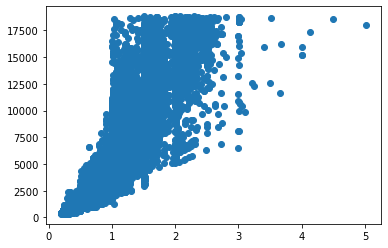

In [309]:
plt.scatter(data_raw['carat'], data_raw['price'])
pass

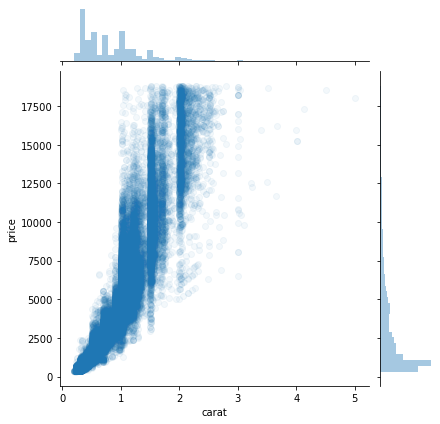

In [310]:
sns.jointplot(x='carat', y='price', alpha=.05, data=data_raw)
pass

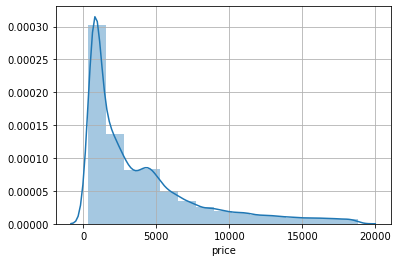

In [311]:
sns.distplot(data_raw['price'], bins=15)
plt.grid()
pass

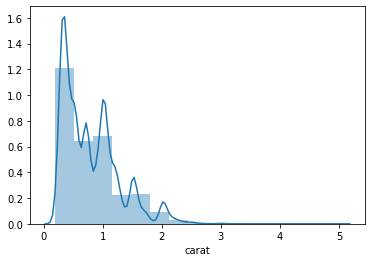

In [312]:
sns.distplot(data_raw['carat'], bins = 15)
pass

Correlation matrix.

In [313]:
corr_mat = data_raw.corr()
corr_mat

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


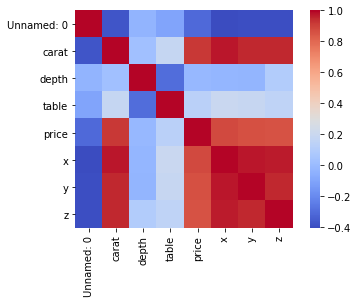

In [314]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

We see that there is a large correlation coefficient between the carat weight and the price of a diamond. And so is the difference between carat weight and diamond size. Which is very logical.

Mustache box.

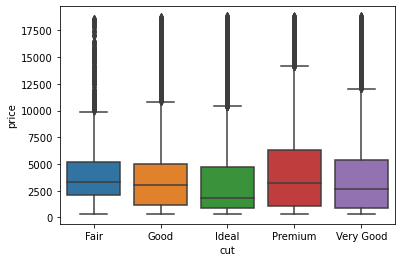

In [315]:
sns.boxplot(x="cut", y="price", data=data_raw)
pass

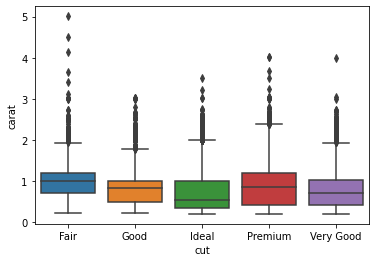

In [316]:
sns.boxplot(x="cut", y="carat", data=data_raw)
pass

## 3. Handling missing values

In [317]:
data_raw.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

There are no missing values in this Dataset.

## 4. Processing of categorical features 

Binarization *cut*.

In [318]:
Building_dummies = pd.get_dummies(data_raw['cut'])

In [319]:
Building_dummies.head()

,Fair,Good,Ideal,Premium,Very Good
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


Removing a column *cut*.

In [320]:
data_raw = pd.concat((data_raw, Building_dummies), axis=1)

In [321]:
data_raw = data_raw.drop(['cut'], axis=1)

In [322]:
data_raw.head()

,Unnamed: 0,carat,color,clarity,depth,table,price,x,y,z,Fair,Good,Ideal,Premium,Very Good
0,1,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0
1,2,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0
2,3,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0
3,4,0.29,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0
4,5,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0


Binarization *color*.

In [323]:
Building_dummies = pd.get_dummies(data_raw['color'])

In [324]:
Building_dummies.head()

,D,E,F,G,H,I,J
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


Removing a column *color*.

In [325]:
data_raw = pd.concat((data_raw, Building_dummies), axis=1)
data_raw = data_raw.drop(['color'], axis=1)

In [326]:
data_raw.head()

,Unnamed: 0,carat,clarity,depth,table,price,x,y,z,Fair,...,Ideal,Premium,Very Good,D,E,F,G,H,I,J
0,1,0.23,SI2,61.5,55.0,326,3.95,3.98,2.43,0,...,1,0,0,0,1,0,0,0,0,0
1,2,0.21,SI1,59.8,61.0,326,3.89,3.84,2.31,0,...,0,1,0,0,1,0,0,0,0,0
2,3,0.23,VS1,56.9,65.0,327,4.05,4.07,2.31,0,...,0,0,0,0,1,0,0,0,0,0
3,4,0.29,VS2,62.4,58.0,334,4.20,4.23,2.63,0,...,0,1,0,0,0,0,0,0,1,0
4,5,0.31,SI2,63.3,58.0,335,4.34,4.35,2.75,0,...,0,0,0,0,0,0,0,0,0,1


Binarization *clarity*.

In [327]:
Building_dummies = pd.get_dummies(data_raw['clarity'])

In [328]:
Building_dummies.head()

,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0


Removing a column *clarity*.

In [329]:
data_raw = pd.concat((data_raw, Building_dummies), axis=1)
data_raw = data_raw.drop(['clarity'], axis=1)

In [330]:
data_raw.head()

,Unnamed: 0,carat,depth,table,price,x,y,z,Fair,Good,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,...,0,0,0,0,0,0,1,0,0,0
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,0,1,0,0
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,...,0,1,0,0,0,1,0,0,0,0


## 5. Normalization of quantitative traits

Many machine learning algorithms are sensitive to data scaling.
Such algorithms, for example, include the method of nearest neighbors, support vector machines, etc.
In this case, the quantitative signs should be normalized.

In [331]:
data_stand = (data_raw - data_raw.mean(axis = 0))/data_raw.std(axis = 0)

In [332]:
data_stand.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z,Fair,Good,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
count,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,...,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,1.448600e-17,3.774170e-14,5.528923e-13,-3.621533e-14,-6.602421e-15,1.177763e-13,8.638663e-14,-2.522116e-13,-2.621758e-14,3.099595e-15,...,-2.744613e-14,2.056262e-14,8.858108e-15,6.549612e-14,-1.145728e-14,-4.754709e-14,5.500044e-15,8.347626e-16,3.075034e-14,1.509123e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.732003e+00,-1.261446e+00,-1.308748e+01,-6.470013e+00,-9.040868e-01,-5.109073e+00,-5.020884e+00,-5.014510e+00,-1.754016e-01,-3.163087e-01,...,-3.342907e-01,-2.343409e-01,-1.180194e-01,-1.852658e-01,-5.653557e-01,-4.532848e-01,-4.225206e-01,-5.422899e-01,-2.696003e-01,-3.219509e-01
25%,-8.660013e-01,-8.395154e-01,-5.231005e-01,-6.521325e-01,-7.476738e-01,-9.103164e-01,-8.882717e-01,-8.909378e-01,-1.754016e-01,-3.163087e-01,...,-3.342907e-01,-2.343409e-01,-1.180194e-01,-1.852658e-01,-5.653557e-01,-4.532848e-01,-4.225206e-01,-5.422899e-01,-2.696003e-01,-3.219509e-01
50%,0.000000e+00,-2.066190e-01,3.531645e-02,-2.046032e-01,-3.839636e-01,-2.777527e-02,-2.147379e-02,-1.237607e-02,-1.754016e-01,-3.163087e-01,...,-3.342907e-01,-2.343409e-01,-1.180194e-01,-1.852658e-01,-5.653557e-01,-4.532848e-01,-4.225206e-01,-5.422899e-01,-2.696003e-01,-3.219509e-01
75%,8.660013e-01,5.106635e-01,5.239313e-01,6.904554e-01,3.487834e-01,7.210475e-01,7.052356e-01,7.103118e-01,-1.754016e-01,-3.163087e-01,...,-3.342907e-01,-2.343409e-01,-1.180194e-01,-1.852658e-01,-5.653557e-01,-4.532848e-01,-4.225206e-01,-5.422899e-01,-2.696003e-01,-3.219509e-01
max,1.732003e+00,8.885992e+00,1.204128e+01,1.680151e+01,3.732404e+00,4.465161e+00,4.654922e+01,4.004720e+01,5.701097e+00,3.161410e+00,...,2.991353e+00,4.267208e+00,8.473027e+00,5.397549e+00,1.768765e+00,2.206078e+00,2.366705e+00,1.843998e+00,3.709125e+00,3.106006e+00


## 6. Splitting data into training and test samples

In [333]:
data_stand.columns

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'Fair',
       'Good', 'Ideal', 'Premium', 'Very Good', 'D', 'E', 'F', 'G', 'H', 'I',
       'J', 'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype='object')

In [334]:
X = data_stand.drop(['price', 'depth', 'table'], axis=1)
y = data_raw['price']

Let's split the data into training and test samples in proportions of 3: 1 (75% - training sample, 25% - test sample):

In [335]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(40455, 13485)

## 7. Nearest Neighbor Classifier

In [336]:
vusualize(X_train, y_train, X_test, y_test, show_figure=True)

NameError: name 'vusualize' is not defined

## 8. Conclusion